In [1]:
%pylab inline
from matplotlib import pyplot as plt
import seaborn as sns
import pytraj as pt
import os
from MMPBSA_mods import API
import pandas as pd 
import numpy as np
import statistics

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
total_pb=np.array([])
total_gb=np.array([])
total_vdw=np.array([])
total_EEL=np.array([])
total_EPB=np.array([])
total_ENPOLAR=np.array([])
for i in range(1,201):               #could change i value here to change the result, drug molecule could probably escape the potential binding site 
    os.chdir(f"/Users/mingyu/MMPBSA/MAA_1C_2P_COX/%d_2/" %i)
    MMGBSA = API.load_mmpbsa_info("_MMPBSA_info")
    totalpb=MMGBSA["pb"]["complex"]["TOTAL"] - MMGBSA["pb"]["receptor"]["TOTAL"] - MMGBSA["pb"]["ligand"]["TOTAL"]
    total_pb=np.concatenate([total_pb,totalpb])
    
    totalgb=MMGBSA["gb"]["complex"]["TOTAL"] - MMGBSA["gb"]["receptor"]["TOTAL"] - MMGBSA["gb"]["ligand"]["TOTAL"]
    total_gb=np.concatenate([total_gb,totalgb])
    
    totalvdw=MMGBSA["pb"]["complex"]["VDWAALS"] - MMGBSA["pb"]["receptor"]["VDWAALS"] - MMGBSA["pb"]["ligand"]["VDWAALS"]
    total_vdw=np.concatenate([total_vdw,totalvdw])
    
    totalEEL=MMGBSA["pb"]["complex"]["EEL"] - MMGBSA["pb"]["receptor"]["EEL"] - MMGBSA["pb"]["ligand"]["EEL"]
    total_EEL=np.concatenate([total_EEL,totalEEL])
    
    totalEPB=MMGBSA["pb"]["complex"]["EPB"] - MMGBSA["pb"]["receptor"]["EPB"] - MMGBSA["pb"]["ligand"]["EPB"]
    total_EPB=np.concatenate([total_EPB,totalEPB])

    totalENPOLAR=MMGBSA["pb"]["complex"]["ENPOLAR"] - MMGBSA["pb"]["receptor"]["ENPOLAR"] - MMGBSA["pb"]["ligand"]["ENPOLAR"]
    total_ENPOLAR=np.concatenate([total_ENPOLAR,totalENPOLAR])
print(total_pb) #using pb 
print(total_gb)
print(total_vdw)
print(total_EEL)
print(total_EPB)
print(total_ENPOLAR)
print('total van der Waals energy:',np.mean(total_vdw),'+-',(statistics.stdev(total_vdw)))
print('total Electrostatic energy:',np.mean(total_EEL),'+-',(statistics.stdev(total_EEL)))
print('total Polar solvation energy:',np.mean(total_EPB),'+-',(statistics.stdev(total_EPB)))
print('total Non-polar solvation energy:',np.mean(total_ENPOLAR),'+-',(statistics.stdev(total_ENPOLAR)))
print("total Energy:",np.mean(total_pb),'+-',(statistics.stdev(total_pb)))

[-18.5345 -21.4954 -25.4605 ... -21.8202 -21.2638 -17.5359]
[-24.331452   -25.8660996  -30.50991912 ... -25.40848976 -25.67004224
 -27.18046872]
[-32.5395 -35.6763 -37.3304 ... -35.2492 -35.757  -35.754 ]
[ -7.9544  -7.6304 -10.8525 ...  -9.8054 -10.292   -9.1137]
[25.2138 24.9797 25.833  ... 26.4304 28.0216 30.5682]
[-3.2544 -3.1683 -3.1107 ... -3.196  -3.2364 -3.2362]
total van der Waals energy: -34.22711968333333 +- 2.57217218404179
total Electrostatic energy: -12.689107066666617 +- 6.167255262751715
total Polar solvation energy: 28.11502836666668 +- 3.5427000713035968
total Non-polar solvation energy: -3.1599634833333328 +- 0.10755894487506308
total Energy: -21.961161716666616 +- 4.782556198050284


Text(0, 0.5, 'ΔE mmpbsa (kcal/mol)')

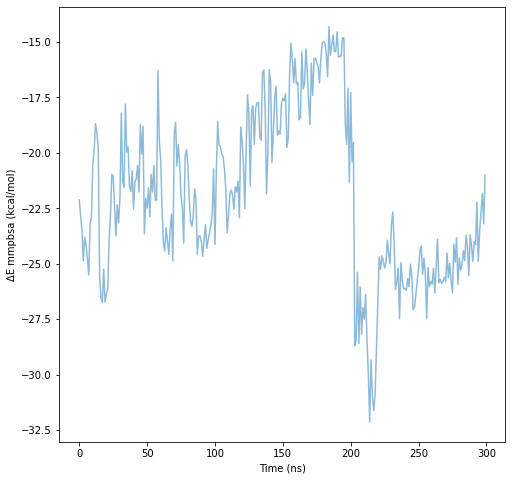

In [13]:
plt.figure(figsize = (8,8))
md_time= list(np.arange(200,300,0.05))
plt.plot(np.mean(total_pb.reshape(300, 20), axis=1),alpha=0.5)

plt.xlabel('Time (ns)')
plt.ylabel('\u0394E mmpbsa (kcal/mol)')